In [38]:
!pip install pandas scikit-learn matplotlib seaborn

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv("/content/drive/My Drive/yield_df.csv")

In [44]:
print(df.head())
print(df.info())


   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     282

In [45]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

print(label_encoders['Item'].classes_)


['Cassava' 'Maize' 'Plantains and others' 'Potatoes' 'Rice, paddy'
 'Sorghum' 'Soybeans' 'Sweet potatoes' 'Wheat' 'Yams']


In [46]:
X = df[['Area', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df['Item']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.00708121 0.00663864 0.00774508 0.0084108  0.00486941]
Average CV Accuracy: 0.0069

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       409
           1       0.00      0.00      0.00       824
           2       0.00      0.00      0.00       111
           3       0.01      0.01      0.01       855
           4       0.00      0.00      0.00       678
           5       0.00      0.00      0.00       608
           6       0.00      0.00      0.00       645
           7       0.00      0.00      0.00       578
           8       0.02      0.02      0.02       772
           9       0.00      0.00      0.00       169

    accuracy                           0.00      5649
   macro avg       0.00      0.00      0.00      5649
weighted avg       0.00      0.00      0.00      5649



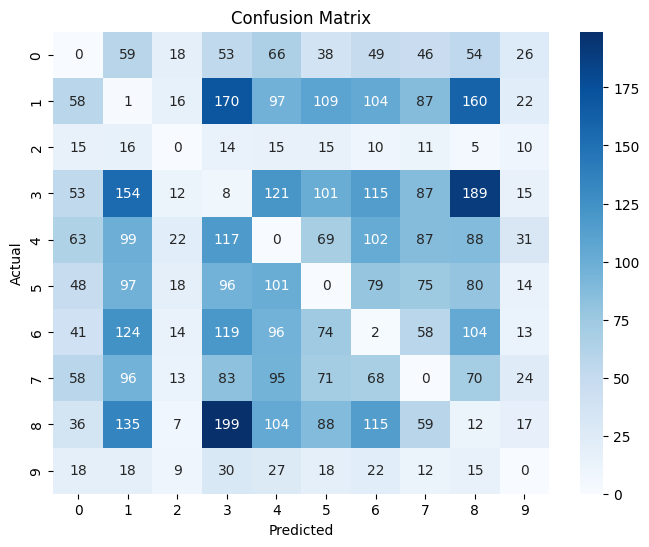

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()